### 1. Data and Library load

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_path = "/content/drive/MyDrive/fastcamp/datas/energy/"
train = pd.read_csv(base_path + "train.csv", encoding='cp949')
test = pd.read_csv(base_path + "test.csv", encoding='cp949')
submission = pd.read_csv(base_path + "sample_submission.csv", encoding='cp949')

### 2. Data Preprocessing with EDA

- 학습 기간 : 2020-06-01 00 ~ 2020-08-24 23

- 예측 기간 : 2020-08-25 00 ~ 2020-08-31 23

- 예측 기간 데이터는 기상청 예보 데이터를 활용 데이터를 사용하기 때문에 기록 시간 단위가 3시간 6시간이다.

### Data Preprocessing

1. 결측치 처리

2. feature selection (분석에 사용하지 않을 column 제거)

3. target distribution

4. time series to find out implied pattern

5. test data 결측치 처리

In [4]:
train.info() # 완벽
test.info() # null 많다.

# null의 이유 : 기록 시간의 단위 
# 기온(°C)        3360 non-null   
# 풍속(m/s)       3360 non-null
# 일조(hr, 3시간)   3360 non-null 
# 강수량(mm, 6시간)  1680 non-nul

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

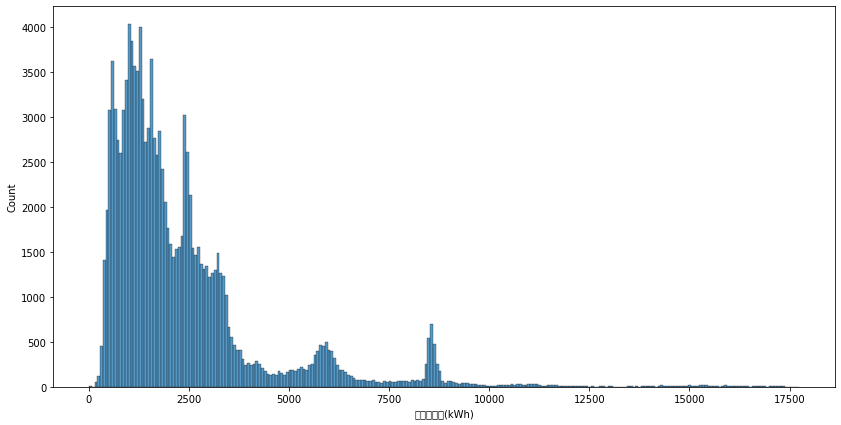

In [5]:
plt.figure(figsize = (14, 7))
sns.histplot(data = train, x = "전력사용량(kWh)")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

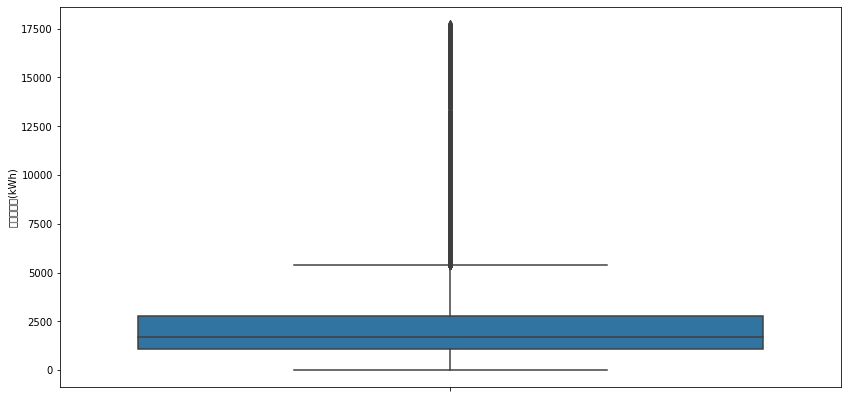

In [6]:
# boxplot : 정규분포가 아닌 경우 -> 데이터가 치우쳐 있다. 따라서 박스플롯 쓰면 이상치가 많이 나올 수 밖에 없어서 생각을 해봐야한다. 
plt.figure(figsize = (14, 7))
sns.boxplot(data = train, y = "전력사용량(kWh)")

In [7]:
train[train["전력사용량(kWh)"] > 17000].shape

(40, 10)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

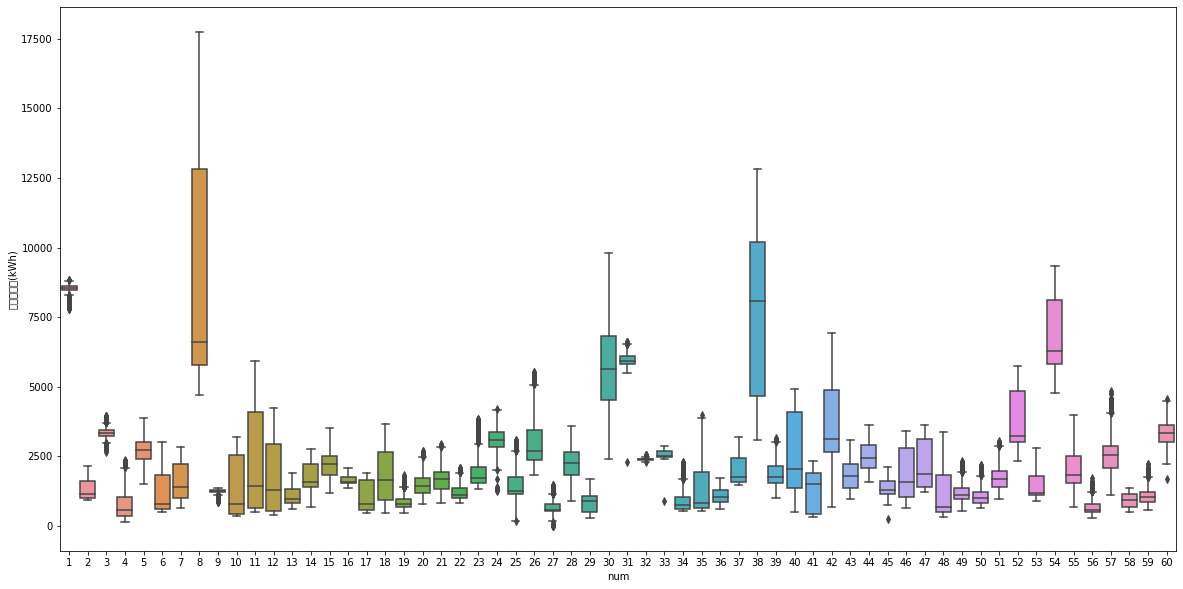

In [8]:
# 건물별 전력사용량을 확인해보자
# 찍어보면 알 수 있는 점 : 건물별 전력 사용량 패턴이 다르다. 
# 이전에 이상치들이 결국 8번 건물이였다는 것을 알 수 있다. 
# 또한 8번 건물의 박스폴롯에는 이상치가 없음을 알 수 있다.
plt.figure(figsize = (20, 10))
sns.boxplot(data = train, x = "num", y = "전력사용량(kWh)")

In [9]:
# date_time 타입 datetime으로 변경하자
train.date_time = pd.to_datetime(train.date_time)
test.date_time = pd.to_datetime(test.date_time)

In [10]:
# column 이름 영어로 바꾸자
train.columns

train.columns = ["num", "date_time", "target", "temperature", "windspeed", "humidity", 
                 "precipitation", "insolation", "elec_cool", "solar"]

test.columns = ["num", "date_time", "temperature", "windspeed", "humidity", 
                 "precipitation", "insolation", "elec_cool", "solar"]

In [11]:
train

,num,date_time,target,temperature,windspeed,humidity,precipitation,insolation,elec_cool,solar
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


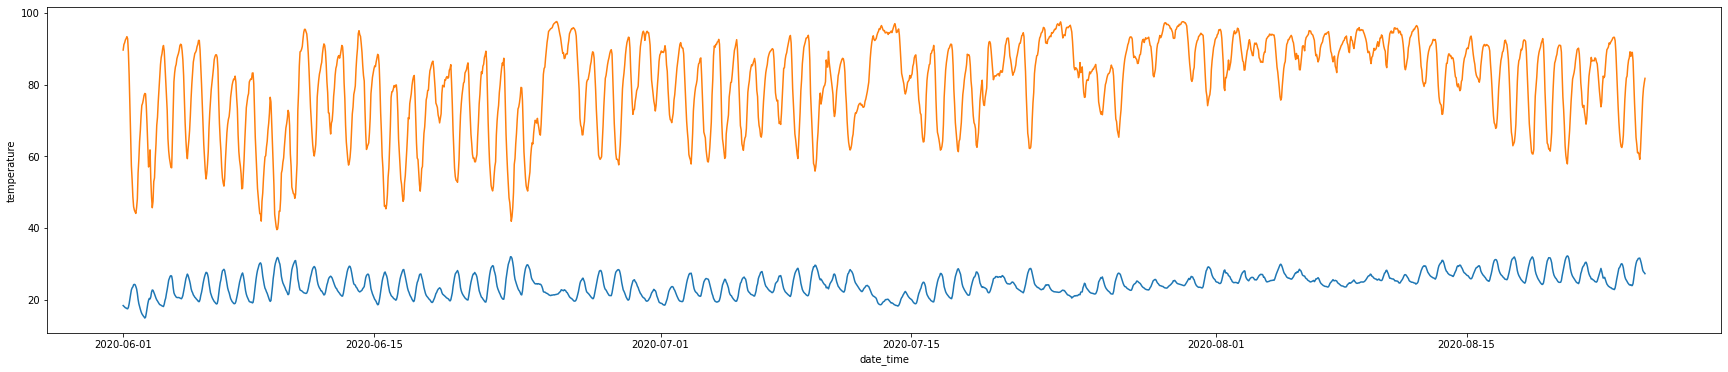

In [12]:
# test data 결측치 처리

# 1. 기상 정보들의 결측치 처리
# 특징 : 시간에 따라 계속 변하는 값이기 때문에 연속성이 높다. 따라서 평균 값으로 nan값을 채우면 문제가 생길 것이란 것을 알아채야 한다.
# 결론 : 선형보관법(linear interpolation)을 적용한다!!!
plt.figure(figsize = (30, 6))
sns.lineplot(data = train, x = "date_time", y = "temperature", ci = None) # ci = confidence interval 
sns.lineplot(data = train, x = "date_time", y = "humidity", ci = None)

In [13]:
# 선형보관법(linear interpolation)을 적용해 결측치 해결
test.temperature = test.temperature.interpolate(method = "linear")
test.humidity = test.humidity.interpolate(method = "linear")
test.windspeed = test.windspeed.interpolate(method = "linear")
test.insolation = test.insolation.interpolate(method = "linear")
test.precipitation = test.precipitation.interpolate(method = "linear")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   num            10080 non-null  int64         
 1   date_time      10080 non-null  datetime64[ns]
 2   temperature    10080 non-null  float64       
 3   windspeed      10080 non-null  float64       
 4   humidity       10080 non-null  float64       
 5   precipitation  10080 non-null  float64       
 6   insolation     10080 non-null  float64       
 7   elec_cool      2296 non-null   float64       
 8   solar          1624 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 708.9 KB


In [14]:
# 2. 건물 정보의 결측치 처리
# train에 있는 건물별 각 시간의 건물 정보를 그대로 쓸 수 있지 않을까?

## to-do 
# 1) train에 있는 각 건물별로 elec_cool_flag와 solar가 같은지 체크
# 결과 : 체크 성공 
train.num.value_counts()
check = train.groupby("num").sum()
check.elec_cool / train.num.value_counts()
check.solar / train.num.value_counts()

# 2) 같다면, test data에 같은 건물 번호를 가지는 데이터에 연결
building_info= train[["num", "elec_cool", "solar"]].drop_duplicates()
# pd.merge : 특정 값(열)을 기준으로 데이터프레임을 병합
test = pd.merge(test.drop(columns = ["elec_cool", "solar"]), building_info, on="num")
test

,num,date_time,temperature,windspeed,humidity,precipitation,insolation,elec_cool,solar
0,1,2020-08-25 00:00:00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0
1,1,2020-08-25 01:00:00,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0
2,1,2020-08-25 02:00:00,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0
3,1,2020-08-25 03:00:00,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0
4,1,2020-08-25 04:00:00,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0
10076,60,2020-08-31 20:00:00,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0
10077,60,2020-08-31 21:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0
10078,60,2020-08-31 22:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0


In [15]:
# Time feature (derived feature) -> 회귀분석 안하는 대신 시간정보를 가공해 새로운 feature를 만들어주자. 
# train.date_time.dt.date
# train.date_time.dt.day
# train.date_time.dt.month
# train.date_time.dt.year
# train.date_time.dt.dayofweek # 요일정보 : 월화수목금토일 -> 0123456

# 함수로 만들면 커스터마이징 가능하다.
# def is_weekend(x) : 
#   if x.dt.datofweek in [5,6] :
#     return 1
#   else: 
#     return 0

def convert_hour(x) : 
  return x.hour

train['dow'] = train.date_time.dt.dayofweek
train['hour'] = train.date_time.apply(convert_hour)
train

,num,date_time,target,temperature,windspeed,humidity,precipitation,insolation,elec_cool,solar,dow,hour
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,0,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,0,2
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,0,3
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,0,19
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,0,20
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,0,21
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,0,22


### 3. Data Preparation
- 전력 사용량을 기준으로 그룹을 나누어보자 : 결과 언급하면 총 4개의 그룹 만들었다.
- X_train & X_val data에 groupby를 이용해 4개의 데이터셋을 만들었다.
- y_train & y_val data는 전력량 정보인 target이 없다. 따라서 인덱스 정보를 가지고 4개의 데이터셋을 만들어준다.

In [16]:
# 예측에 사용하지 않을 columns
train = train.drop(columns = ["date_time"])

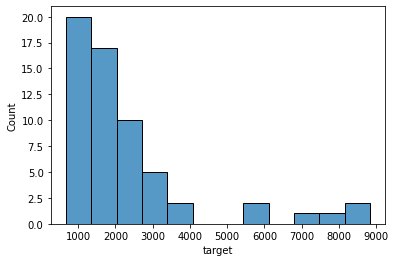

In [17]:
# 건물별 전략사용량의 평균을 랭크를 기준으로 확인해보자.
mean_target = pd.DataFrame(train.groupby("num").mean().target)
mean_target.rank(ascending = False)
sns.histplot(data=mean_target, x = "target")
#mean_target.hist(bins = 10)

In [18]:
mark1 = mean_target < 2000
mark2 = mean_target < 4000
mark3 = mean_target < 7000
mark4 = mean_target > 7000

group1 = [i for i in mean_target[mark1].dropna().index]
group2 = [i for i in mean_target[mark2 & ~mark1].dropna().index]
group3 = [i for i in mean_target[mark3 & ~mark2].dropna().index]
group4 = [i for i in mean_target[mark4].dropna().index]

print(group1, len(group1))
print(group2, len(group2))
print(group3, len(group3))
print(group4, len(group4))

[2, 4, 6, 7, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 29, 34, 35, 36, 37, 39, 41, 43, 45, 46, 48, 49, 50, 51, 53, 56, 58, 59] 37
[3, 5, 11, 15, 24, 26, 28, 32, 33, 40, 42, 44, 47, 52, 55, 57, 60] 17
[30, 31, 54] 3
[1, 8, 38] 3


In [ ]:
# 그룹별 target simple plot 찍어보기
plt.figure(figsize=(30, 24))
plt.suptitle("group1 = mean_target < 2000", fontsize=30, y=0.95)
for i, num in enumerate(group1) : 
    ax = plt.subplot(8, 5, i + 1)
    data=train.loc[train.num == num]
    data.target.plot(ax = ax)

plt.figure(figsize=(30, 24))
plt.suptitle("group2 = mean_target < 4000", fontsize=30, y=0.95)
for i, num in enumerate(group2) : 
    ax = plt.subplot(8, 5, i + 1)
    data=train.loc[train.num == num]
    data.target.plot(ax = ax)

plt.figure(figsize=(30, 5))
plt.suptitle("group3 = mean_target < 7000", fontsize=30, y=0.95)
for i, num in enumerate(group3) : 
    ax = plt.subplot(8, 5, i + 1)
    data=train.loc[train.num == num]
    data.target.plot(ax = ax)

plt.figure(figsize=(30, 5))
plt.suptitle("group4 = mean_target > 7000", fontsize=30, y=0.95)
for i, num in enumerate(group4) : 
    ax = plt.subplot(8, 5, i + 1)
    data=train.loc[train.num == num]
    data.target.plot(ax = ax)

In [ ]:
# def grouped_train_df(group_num, df) : 
#   grouped_df = pd.DataFrame()
#   for num in group_num : 
#     grouped_df = grouped_df.append(df[df.num == num])
#     #print(type(grouped_df))
#   return grouped_df

# target_nums = [group1, group2, group3, group4]
# names = ["grouped_X_train", "grouped_X_val"]
# df_set = [train, X_val]

# total_grouped_train_dic = {} 
# for i, target_df in enumerate(df_set) : 
#   #print(target_df)
#   for nums in target_nums : 
#     #print(group)
#     #print(group_num.index(group) + 1)
#     name = names[i] + str(target_nums.index(nums) + 1)
#     #print(name)
#     total_grouped_train_dic[name] = grouped_train_df(group_num = nums, df = target_df)
#     #print(type(name))
#     #total_grouped_list.append(name)

# total_grouped_train_dic.keys()

In [86]:
def grouped_train_df(group_num, df) : 
  grouped_df = pd.DataFrame()
  for num in group_num : 
    grouped_df = grouped_df.append(df[df.num == num])
  return grouped_df

target_nums = [group1, group2, group3, group4]
names = ["grouped_train"]
df_set = [train]

total_grouped_train_dic = {} 
for i, target_df in enumerate(df_set) : 
  for nums in target_nums : 
    name = names[i] + str(target_nums.index(nums) + 1)
    total_grouped_train_dic[name] = grouped_train_df(group_num = nums, df = target_df)

total_grouped_train_dic.keys()

dict_keys(['grouped_train1', 'grouped_train2', 'grouped_train3', 'grouped_train4'])

In [105]:
total_grouped_train_dic["grouped_train1"].shape

(75480, 11)

In [164]:
# 트테트테
# validation dataset과 test dataset의 크기를 맞추면 좋다.
from sklearn.model_selection import train_test_split

def make_X_y(df) : 
    X = df.drop(columns = "target") # feature vector
    y = df.target # target value
    return X, y
  
def train_val(X_df, y_df) : 
  X, y = make_X_y(df)
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
  return X_train, X_val, y_train, y_val

total_split_dic = {}
for name, my_df in total_grouped_train_dic.items() : 
  X, y = make_X_y(my_df)
  X_train, X_val, y_train, y_val = train_val(X_df = X, y_df = y)
  total_split_dic[name] = X_train, X_val, y_train, y_val

total_split_dic.keys()
# total_split_dic.keys() 간단 설명
# total_split_dic["grouped_train1"][0] = X_train
# total_split_dic["grouped_train1"][1] = X_val
# total_split_dic["grouped_train1"][2] = y_train
# total_split_dic["grouped_train1"][3] = y_val

dict_keys(['grouped_train1', 'grouped_train2', 'grouped_train3', 'grouped_train4'])

In [21]:
# 'grouped_X_train1', 'grouped_X_train2' : 67852 rows ---> LGBM 사용해보자
# 'grouped_X_train3', 'grouped_X_train4' : 5537 rows ----> 10000개보다 작음. RandomForestRegressor 사용하자

### 4. Training 
  1. 사용한 regressor

    1) 'grouped_X_train1', 'grouped_X_train2' : 67852 rows ---> LGBM 사용해보자

    2) 'grouped_X_train3', 'grouped_X_train4' : 5537 rows ----> 1000개보다
    작음. RandomForestRegressor 사용하자


  2. total_split_dic 이해를 위한 설명 : 키 하나에 4개의 값이 들어가 있다.
    


    ex)
    total_split_dic["grouped_train1"][0] = X_train
    total_split_dic["grouped_train1"][1] = X_val
    total_split_dic["grouped_train1"][2] = y_train
    total_split_dic["grouped_train1"][3] = y_val

In [153]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

reg = LGBMRegressor()
reg2 = RandomForestRegressor()

reg.fit(total_split_dic["grouped_train1"][0], total_split_dic["grouped_train1"][2])
reg.fit(total_split_dic["grouped_train2"][0], total_split_dic["grouped_train2"][2])

reg2.fit(total_split_dic["grouped_train3"][0], total_split_dic["grouped_train3"][2])
reg2.fit(total_split_dic["grouped_train4"][0], total_split_dic["grouped_train4"][2])

RandomForestRegressor()

##### 그룹을 나누어 트레이닝 시키자.

### 5. Evaluation
- SMAPE(Symmetric mean absolute percentage error) : 작을 수록 성과가 좋음을 의미

In [154]:
def smape(true, pred):
    true = np.array(true)  # np.array로 바꿔야 에러 없음
    pred = np.array(pred)
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred)))  # *2 , *100은 상수이므로 생략

pred_train_1 = reg.predict(total_split_dic["grouped_train1"][0])
pred_val_1 = reg.predict(total_split_dic["grouped_train1"][1])
pred_train_2 = reg.predict(total_split_dic["grouped_train2"][0])
pred_val_2 = reg.predict(total_split_dic["grouped_train2"][1])


pred_train_3 = reg2.predict(total_split_dic["grouped_train3"][0])
pred_val_3 = reg2.predict(total_split_dic["grouped_train3"][1])
pred_train_4 = reg2.predict(total_split_dic["grouped_train4"][0])
pred_val_4 = reg2.predict(total_split_dic["grouped_train4"][1])

print("--- LightGBM Regressor for group 1 & 2 ---")
print("group1 : Train SMAPE : %.4f" % smape(total_split_dic["grouped_train1"][2], pred_train_1))
print("group1 : val SMAPE : %.4f" %smape(total_split_dic["grouped_train1"][3], pred_val_1))
print("group2 : Train SMAPE : %.4f" % smape(total_split_dic["grouped_train2"][2], pred_train_2))
print("group2 : val SMAPE : %.4f" %smape(total_split_dic["grouped_train2"][3], pred_val_2))


print("\n--- RandomForestRegressor for group 3 & 4---")
print("group3 : Train SMAPE : %.4f" % smape(total_split_dic["grouped_train3"][2], pred_train_3))
print("group3 : val SMAPE : %.4f" %smape(total_split_dic["grouped_train3"][3], pred_val_3))
print("group4 : Train SMAPE : %.4f" % smape(total_split_dic["grouped_train4"][2], pred_train_4))
print("group4 : val SMAPE : %.4f" %smape(total_split_dic["grouped_train4"][3], pred_val_4))

--- LightGBM Regressor for group 1 & 2 ---
group1 : Train SMAPE : 0.0538
group1 : val SMAPE : 0.0553
group2 : Train SMAPE : 0.0538
group2 : val SMAPE : 0.0553

--- RandomForestRegressor for group 3 & 4---
group3 : Train SMAPE : 0.0103
group3 : val SMAPE : 0.0268
group4 : Train SMAPE : 0.0103
group4 : val SMAPE : 0.0268


### 6. Hyper Parameter Tuning
- GridsearchCV : 주어진 하이퍼파라미터 조합을 모두 테스트하는 방법

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

"""
파라미터 설명 공식 다큐먼츠
https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
"""

""" 
LGBMRegressor() 파라미터 종류들
num_leaves: int = 31, max_depth: int = -1, learning_rate: float = 0.1, n_estimators: int = 100, 
subsample_for_bin: int = 200000, objective: Any | None = None, class_weight: Any | None = None, 
min_split_gain: float = 0, min_child_weight: float = 0.001, min_child_samples: int = 20, subsample: float = 1, 
subsample_freq: int = 0, colsample_bytree: float = 1, reg_alpha: float = 0, reg_lambda: float = 0, random_state: Any | None = None, 
n_jobs: int = -1, silent: bool = True, importance_type: str = 'split', **kwargs: Any) -> None
"""

"""
max_depth: int = -1
num_leaves: int = 31
learning_rate: float = 0.1
n_estimators: int = 100
min_child_samples: int = 20
"""

param_grid = {
    "max_depth" : [7,8],
    "num_leaves" : [160, 150],
    "learning_rate" : [0.2, 0.4],
    "min_data_in_leaf" : [100, 200],
    "random_state" : [42]
} # 2x2x2x2x1 = 16가지 하이퍼파라미터 조합을 테스트한다. 

smape_func = make_scorer(smape)
gcv = GridSearchCV(LGBMRegressor(), param_grid, scoring = smape_func, verbose = 1)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.2, 0.4], 'max_depth': [7, 8],
                         'min_data_in_leaf': [100, 200],
                         'num_leaves': [160, 150], 'random_state': [42]},
             scoring=make_scorer(smape), verbose=1)

In [156]:
best_model = gcv.best_estimator_
best_model

"""
LGBMRegressor(learning_rate=0.4, max_depth=8, min_data_in_leaf=100,
              num_leaves=160, random_state=42)
"""

'\nLGBMRegressor(learning_rate=0.4, max_depth=8, min_data_in_leaf=100,\n              num_leaves=160, random_state=42)\n'

In [158]:
pred_train_5 = best_model.predict(total_split_dic["grouped_train1"][0])
pred_val_5 = best_model.predict(total_split_dic["grouped_train1"][1])
pred_train_6 = best_model.predict(total_split_dic["grouped_train2"][0])
pred_val_6 = best_model.predict(total_split_dic["grouped_train2"][1])

print("--- LightGBM Regressor for group 1 & 2 ---")
print("--- After Hyper Parameter Tuning ---")
print("group1 : Train SMAPE : %.4f" % smape(total_split_dic["grouped_train1"][2], pred_train_5))
print("group1 : val SMAPE : %.4f" %smape(total_split_dic["grouped_train1"][3], pred_val_5))
print("group2 : Train SMAPE : %.4f" % smape(total_split_dic["grouped_train2"][2], pred_train_6))
print("group2 : val SMAPE : %.4f" %smape(total_split_dic["grouped_train2"][3], pred_val_6))

--- LightGBM Regressor for group 1 & 2 ---
--- After Hyper Parameter Tuning ---
group1 : Train SMAPE : 0.0445
group1 : val SMAPE : 0.0463
group2 : Train SMAPE : 0.0445
group2 : val SMAPE : 0.0463


### 7. Prediction & Submission


In [162]:
## To-do : test 데이터를 train 데이터와 같은 전처리를 적용해서 best_model로 예측한 값을 result라는 변수에 저장해주세요.
test['dow'] = test.date_time.dt.dayofweek
test['hour'] = test.date_time.dt.hour
X_test = test.drop(columns = "date_time")
result = best_model.predict(X_test)
result

array([ 905.93306827,  823.98204261,  875.48365987, ..., 1178.82662539,
       1135.8514964 , 1001.68153964])

In [163]:
submission = pd.read_csv(base_path + "sample_submission.csv")
submission["answer"] = result
submission.to_csv("sample_submission.csv", index = False)